In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense, SimpleRNN

# Paso 1: Preprocesamiento de datos (ejemplo básico)

time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) # Use square brackets [] to create a list, which can be converted to a NumPy array with a defined length
print("time_series: ", time_series)
train_size = int(len(time_series) * 0.6) # Tamaño del conjunto de entrenamiento
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data:", train_data)

print("test_data", test_data)

time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data: [1 2 3 4 5 6 7 8 9]
test_data [10 11 12 13 14 15]


In [6]:
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y) # Indent the lines within the function

seq_length = 4

X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)
print("Conjunto de secuencias de entrenamiento:\n", X_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("Conjunto de secuencias de prueba:\n", X_test)
print("Etiquetas de prueba:\n", y_test)

Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 38.9943
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 38.4638
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 37.9343
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 37.4060
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 36.8788
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 36.3528
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 35.8281
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 35.3046
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 34.7826
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 34.2620
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 33.7428
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 33.2251
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 32.7089
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 32.1943
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 31.6812
Epoch 16/200
1/1 ━

<Axes: >

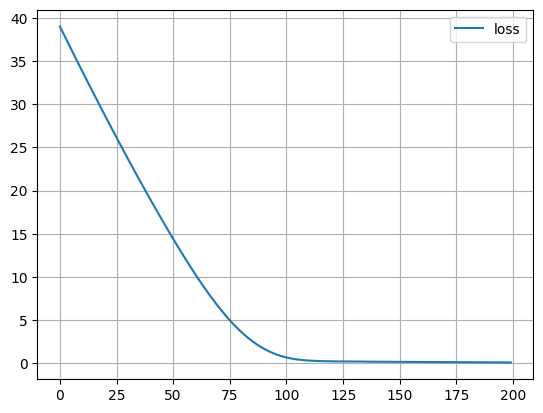

In [10]:
model = Sequential()
model.add(SimpleRNN(
16, activation= 'relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

#Entrenamiento del modelo:

#Se entrena el modelo utilizando los datos de entrenamiento y se grafica el
#historial del entrenamiento.

history = model.fit(X_train, y_train, epochs=200)

pd.DataFrame(history.history).plot(grid=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 2.3942
Pérdida en el conjunto de prueba: 2.394174575805664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


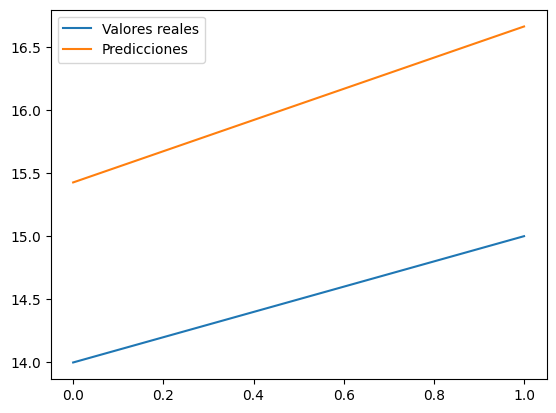

In [11]:
#Evaluo el modelo anterior realiza predicciones

import matplotlib.pyplot as plt
# Evaluación del modelo
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)

# Predicciones
predictions = model.predict(X_test)

# Visualización de las predicciones
plt.plot(y_test, label='Valores reales')
plt.plot(predictions, label='Predicciones')
plt.legend()
plt.show()


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 44.7177 - val_loss: 157.1454
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 44.0243 - val_loss: 153.5658
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 43.3328 - val_loss: 150.0120
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 42.6423 - val_loss: 146.4774
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 41.9522 - val_loss: 142.9578
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 41.2619 - val_loss: 139.4473
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 40.5710 - val_loss: 135.9435
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 39.8792 - val_loss: 132.4427
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 39.1858 - val_loss: 128.9548
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 38.4907 - val_loss: 125.4810
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 37.7925 - val_loss: 122.0163
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/ste

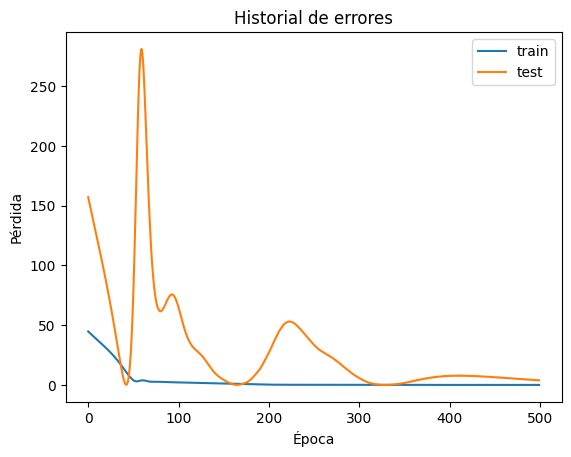

In [12]:
# Mejora el rendimiento y grafica e historial de errores

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

# ... (código anterior)

# Mejora del modelo
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(seq_length, 1)))  # Usando LSTM en lugar de SimpleRNN
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo con más épocas y validación
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# Gráfica del historial de errores (pérdida)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Historial de errores')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

# ... (resto del código para evaluación y predicciones)
